<a href="https://colab.research.google.com/github/Sarthakj0805/Regression_Analysis/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Boston Housing price regression dataset describes 13 numerical properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. This is an example of a regression predictive modeling problem. here I am using the Keras library to perform regression analysis on the Dataset.

In [59]:
#importing all the required libraries
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
#Loading the dataset using keras
(trainx, trainy), (testx, testy) = boston_housing.load_data()
print(f'Training data : {trainx.shape}')
print(f'Test data : {testx.shape}')

# stadardizing the training and testing data points using mean and std of training data for both
mean = trainx.mean(axis=0)
std = trainx.std(axis=0)

trainx -= mean
trainx /= std

testx -= mean
testx /= std


Training data : (404, 13)
Test data : (102, 13)


In [61]:
#define the baseline model
def build_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(trainx.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    #using the mean squared error loss function with RMSprop optimizer
    model.compile(optimizer='RMSprop', loss='mse', metrics=['mae'])
    return model

In [62]:
# plot the learning curve for the loss metric
def summary_plots(history):
  sns.set(context='notebook', palette='bright', style='darkgrid')
  # plot loss
  plt.subplot(211)
  plt.title('MSE')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.plot(history.history['mae'], color='green', label='train')
  plt.plot(history.history['val_mae'], color='red', label='test')
  plt.legend(['train', 'val'])
  plt.show()
  plt.close()

Processing fold # 0


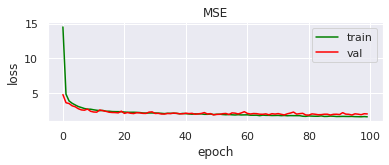

Processing fold # 1


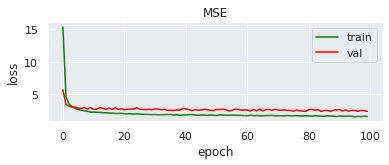

Processing fold # 2


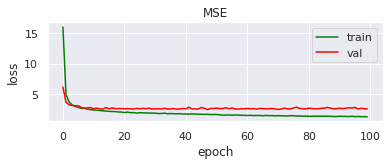

Processing fold # 3


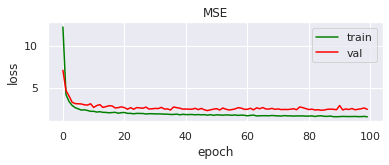

In [63]:
k = 4
num_val_samples = len(trainx) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    valx = trainx[i * num_val_samples: (i+1) * num_val_samples]
    valy = trainy[i * num_val_samples: (i+1) * num_val_samples]
    partial_trainx = np.concatenate([trainx[:i * num_val_samples], trainx[(i+1) * num_val_samples:]], axis=0)
    partial_trainy = np.concatenate([trainy[:i * num_val_samples],trainy[(i+1)*num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_trainx, partial_trainy, epochs=num_epochs, validation_data=(valx, valy), batch_size=1, verbose=0)
    summary_plots(history)
    val_mse, val_mae = model.evaluate(valx, valy, verbose=0)
    all_scores.append(val_mae)

In [64]:
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

all_scores : [1.9675356149673462, 2.4035747051239014, 2.628877639770508, 2.3913981914520264]
mean all scores : 2.3478465378284454


In [65]:
model = build_model()
model.fit(trainx, trainy, epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(testx, testy)
print("test_mean_squared_score: ",test_mse_score, " thousand squared dollars")
print("test_mean_absolute_score: ",test_mae_score, " thousand dollars")

4/4 [==============================] - 0s 2ms/step - loss: 18.1650 - mae: 2.6886
test_mean_squared_score:  18.164993286132812  thousand squared dollars
test_mean_absolute_score:  2.6886022090911865  thousand dollars
